Titanic ML

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


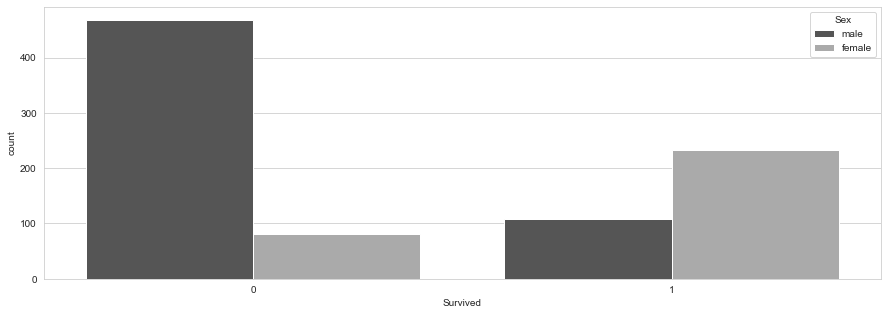

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(x='Survived',data=df,hue='Sex',palette='gray')

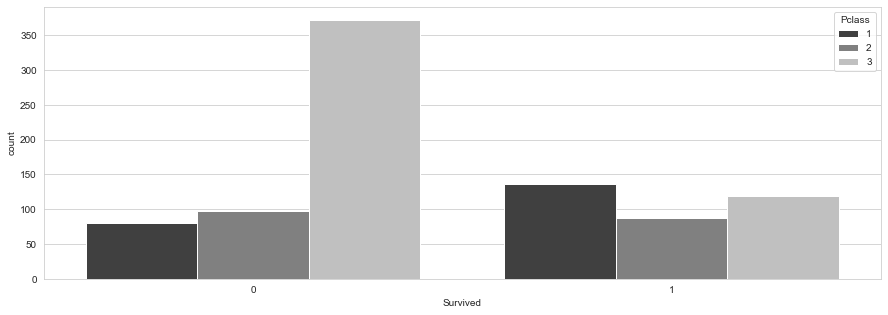

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x='Survived',data=df,hue='Pclass', palette='gray')

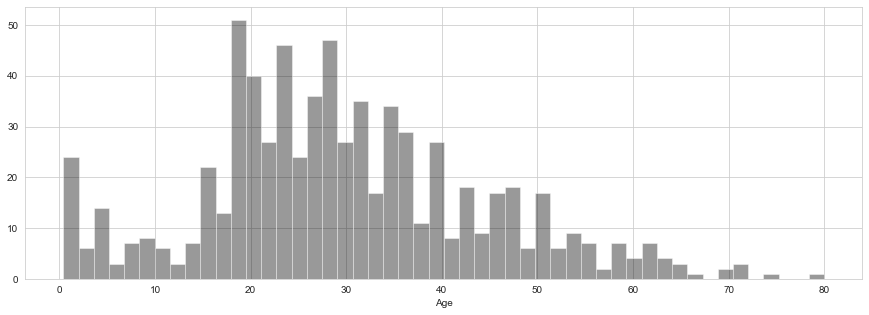

In [10]:
plt.figure(figsize=(15,5))
sns.distplot(df['Age'].dropna(),kde=False,bins=50,color='black')

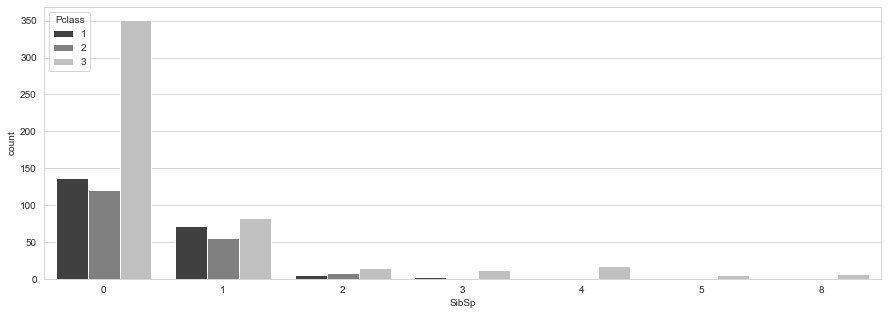

In [11]:
plt.figure(figsize=(15,5))
sns.countplot('SibSp', data=df, hue='Pclass',palette='gray')

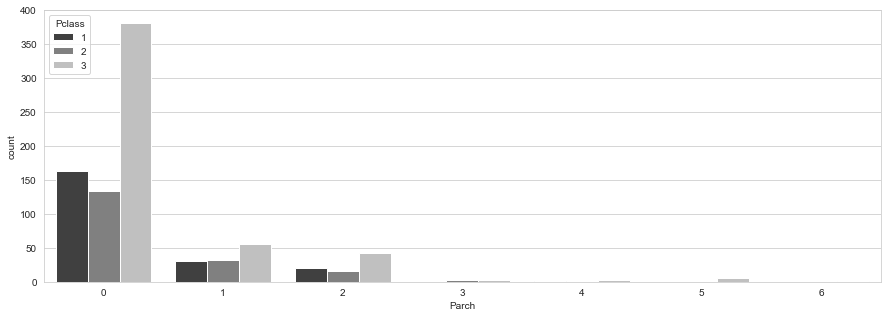

In [12]:
plt.figure(figsize=(15,5))
sns.countplot('Parch', data=df,hue='Pclass',palette='gray')

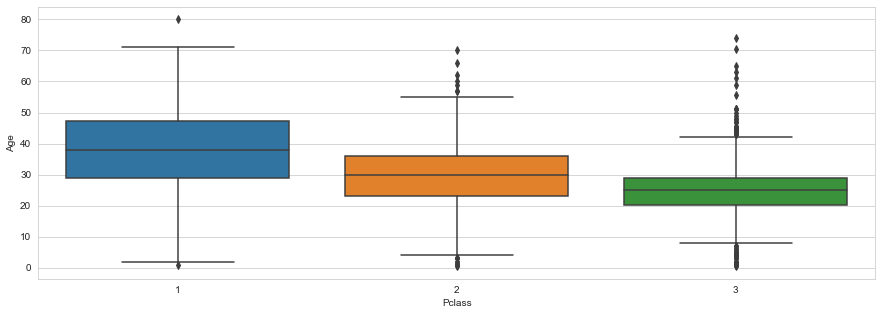

In [55]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Pclass', y=df['Age'].dropna(), data=df)

In [15]:
import plotly.express as px

In [29]:
fig = px.box(df, x='Pclass', y='Age',color='Sex',points="all")
fig.show()

In [34]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    if pd.isnull(Age):

        if Pclass == 1 and Sex =='male':
            return 40
        elif Pclass == 1 and Sex =='female':
            return 35

        elif Pclass == 2 and Sex == 'male':
            return 30
        elif Pclass == 2 and Sex == 'female':
            return 28
        elif Pclass == 3 and Sex == 'male':
            return 25
        
        else:
            return 21.5

    else:
        return Age

In [35]:
df['Age'] = df[['Age','Pclass','Sex']].apply(impute_age,axis=1)

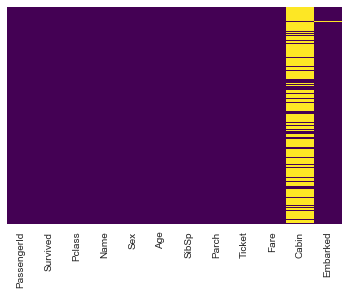

In [36]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
df.drop(['Cabin'], axis=1, inplace=True)

In [43]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [45]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [49]:
Embarked = pd.get_dummies(df['Embarked'])

In [50]:
df.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [51]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [52]:
df = pd.concat([df, sex, Embarked], axis=1)

In [53]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


let's split our data to train and test data

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.60, 
                                                    random_state=101)

let's create the model

In [58]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr = LogisticRegression(solver='lbfgs')

In [62]:
lr.fit(X_train, y_train)

/Users/rustam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
predictions_liner = lr.predict(X_test)
#list_predict = predictions.tolist()

let's evaluate our model

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
print(classification_report(y_test, predictions_liner))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       326
           1       0.78      0.66      0.71       209

    accuracy                           0.79       535
   macro avg       0.79      0.77      0.78       535
weighted avg       0.79      0.79      0.79       535



In [76]:
print(confusion_matrix(y_test, predictions_liner))

[[288  38]
 [ 72 137]]


let's use KNN model, need to prepare the data for model

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

In [80]:
scaler.fit(df.drop('Survived',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
scaled_df = scaler.transform(df.drop('Survived',axis=1))

In [85]:
df_scaled = pd.DataFrame(scaled_df, columns = df.columns.drop('Survived'))
df_scaled.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,-1.730108,0.827377,-0.534891,0.432793,-0.473674,-0.502445,0.737695,-0.482043,-0.307562,0.619306
1,-1.726220,-1.566107,0.668392,0.432793,-0.473674,0.786845,-1.355574,2.074505,-0.307562,-1.614710
2,-1.722332,0.827377,-0.234070,-0.474545,-0.473674,-0.488854,-1.355574,-0.482043,-0.307562,0.619306
3,-1.718444,-1.566107,0.442776,0.432793,-0.473674,0.420730,-1.355574,-0.482043,-0.307562,0.619306
4,-1.714556,0.827377,0.442776,-0.474545,-0.473674,-0.486337,0.737695,-0.482043,-0.307562,0.619306


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df['Survived'], test_size=0.6, random_state=101)

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [90]:
KNN.fit(X_train,y_train)
pred = KNN.predict(X_test)

In [91]:
print(confusion_matrix(y_test,pred))

[[268  58]
 [ 76 133]]


In [92]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       326
           1       0.70      0.64      0.66       209

    accuracy                           0.75       535
   macro avg       0.74      0.73      0.73       535
weighted avg       0.75      0.75      0.75       535



In [93]:
from sklearn.model_selection import GridSearchCV

In [97]:
n_neighbors_array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print (best_cv_err, best_n_neighbors)

/Users/rustam/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



0.1910112359550562 11


In [98]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)

In [101]:
knn.fit(X_train,y_train)
prediction_best = knn.predict(X_test)

In [102]:
print(confusion_matrix(y_test,prediction_best))

[[282  44]
 [ 65 144]]


In [103]:
print(classification_report(y_test,prediction_best))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       326
           1       0.77      0.69      0.73       209

    accuracy                           0.80       535
   macro avg       0.79      0.78      0.78       535
weighted avg       0.79      0.80      0.79       535



lets' see what we receive use the RF

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.60, 
                                                    random_state=101)

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
dtree = DecisionTreeClassifier()

In [108]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [110]:
predictions_dt = dtree.predict(X_test)

In [111]:
print(classification_report(y_test,predictions_dt))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       326
           1       0.67      0.68      0.68       209

    accuracy                           0.75       535
   macro avg       0.73      0.73      0.73       535
weighted avg       0.75      0.75      0.75       535



In [112]:
print(confusion_matrix(y_test,predictions_dt))

[[257  69]
 [ 67 142]]


In [122]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=400, random_state=101)
rf.fit(X_train, y_train)
prediction_random_forest = rf.predict(X_test)
print(classification_report(y_test,prediction_random_forest))
print(confusion_matrix(y_test,prediction_random_forest))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       326
           1       0.77      0.71      0.74       209

    accuracy                           0.80       535
   macro avg       0.80      0.79      0.79       535
weighted avg       0.80      0.80      0.80       535

[[282  44]
 [ 61 148]]


let's see how to deal with gbt

In [126]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=600, random_state=101)
gbt.fit(X_train, y_train)
prediction_GBT = rf.predict(X_test)
print(classification_report(y_test,prediction_GBT))
print(confusion_matrix(y_test,prediction_GBT))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       326
           1       0.77      0.71      0.74       209

    accuracy                           0.80       535
   macro avg       0.80      0.79      0.79       535
weighted avg       0.80      0.80      0.80       535

[[282  44]
 [ 61 148]]


Conclusion: we implement the severals ML nodels and the best result show to us the RF model with 